In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from pandas import DataFrame 
from datetime import datetime
from dateutil.relativedelta import relativedelta #used to represent intervals of timeframe
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore') 

In [2]:
train_data = pd.read_csv('F:/WinterSem2019/SET Project/train_data_stroke.csv',low_memory=False,skipinitialspace=True)
test_data = pd.read_csv('F:/WinterSem2019/SET Project/test_data.csv',low_memory=False,skipinitialspace=True)

In [3]:
print(test_data.shape)
print(train_data.shape)
print(test_data.columns)
print(train_data.columns)

(18601, 11)
(43400, 12)
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'Marital_Status', 'Work Profile', 'Residence_type', 'avg_glucose_level',
       'BMI', 'smoking_status', 'stroke'],
      dtype='object')


**Since there is no stroke column available in test dataset , we will be considering only Train dataset for whole analysis**

In [4]:
data_stroke =train_data

In [5]:
data_stroke.head()

,id,gender,age,hypertension,heart_disease,Marital_Status,Work Profile,Residence_type,avg_glucose_level,BMI,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
data_stroke.isnull().sum() #null values for each of the feature variables

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
Marital_Status           0
Work Profile             0
Residence_type           0
avg_glucose_level        0
BMI                   1462
smoking_status       13292
stroke                   0
dtype: int64

**EDA on dataset**

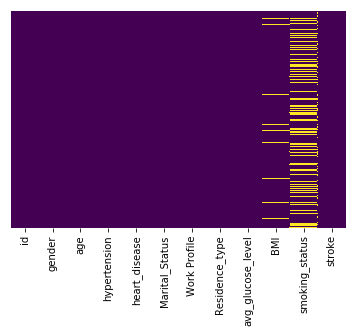

In [7]:
sns.heatmap(data_stroke.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

**A countplot shows the counts of observations in each categorical bin using bars.**

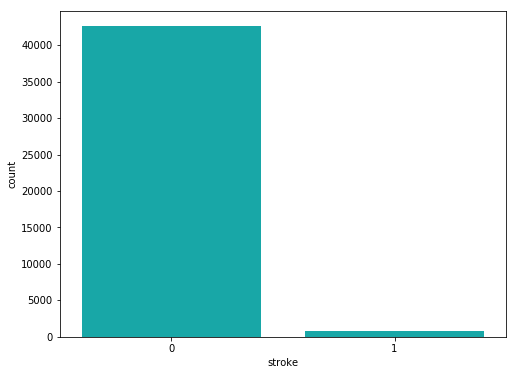

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="stroke", data=data_stroke, color="c")
plt.show()

**As we can see that this is a highly imbalanced dataset with the count of patients having stroke being a very minute fraction of the entire dataset**

Text(0,0.5,'Probability Density')

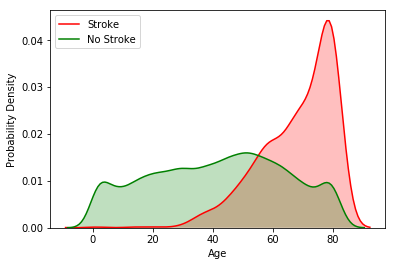

In [9]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'age'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'age'], color='g', shade=True, Label='No Stroke') 
  
plt.xlabel('Age') 
plt.ylabel('Probability Density') 

**This density estimate plot compares the probability density of patients with or without stroke on the range of ages**

Text(0,0.5,'Probability Density')

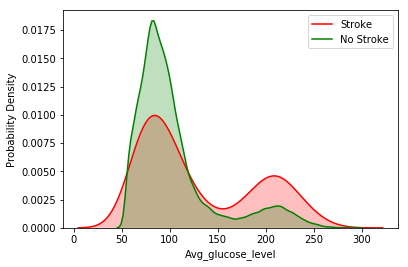

In [10]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'avg_glucose_level'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'avg_glucose_level'], color='g', shade=True, Label='No Stroke') 
  
plt.xlabel('Avg_glucose_level') 
plt.ylabel('Probability Density') 

**This density estimate plot compares the probability density of patients with or without stroke plotted over their average glucose level values**

Text(0,0.5,'Probability Density')

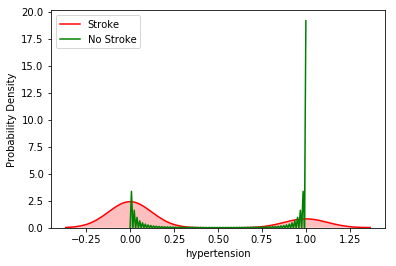

In [11]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'hypertension'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'hypertension'], color='g', shade=True, Label='No Stroke') 
  
plt.xlabel('hypertension') 
plt.ylabel('Probability Density') 

Text(0,0.5,'Probability Density')

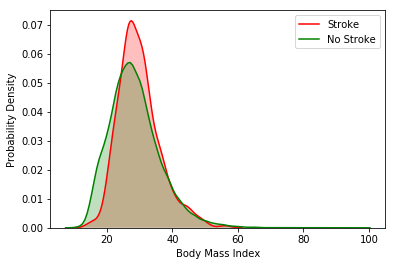

In [12]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'BMI'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'BMI'], color='g', shade=True, Label='No Stroke') 
  
plt.xlabel('Body Mass Index') 
plt.ylabel('Probability Density') 

**Handling Missing Data**

In [13]:
data_stroke['BMI'].fillna(data_stroke['BMI'].mean(),inplace=True) #Filling the missing values of BMI with the mean values 

**Handling the Categorical columns**

In [14]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
labelEncoder = LabelEncoder()
data_stroke['gender'] = labelEncoder.fit_transform(data_stroke['gender'])
data_stroke['Marital_Status'] = labelEncoder.fit_transform(data_stroke['Marital_Status'])
data_stroke['Work Profile'] = labelEncoder.fit_transform(data_stroke['Work Profile'])
data_stroke['Residence_type'] = labelEncoder.fit_transform(data_stroke['Residence_type'])

In [15]:
data_stroke.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
Marital_Status           0
Work Profile             0
Residence_type           0
avg_glucose_level        0
BMI                      0
smoking_status       13292
stroke                   0
dtype: int64

In [16]:
print(data_stroke.smoking_status.value_counts())
print(data_stroke[data_stroke.smoking_status.isnull()]['stroke'].value_counts())

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64
0    13147
1      145
Name: stroke, dtype: int64


** Dropping the smoking_status column , Since 30% of data is missing**

In [17]:
data_stroke.drop('smoking_status',axis = 1, inplace = True)

**Patient ID column is not required in this Logistic Regression Prediction **

In [18]:
data_stroke.drop('id',axis = 1, inplace = True)

In [19]:
data_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
Marital_Status       0
Work Profile         0
Residence_type       0
avg_glucose_level    0
BMI                  0
stroke               0
dtype: int64

**UnderSampling technique**
 
Since the dataset is imbalanced , the undersampling technique have been used in order to balance the data

In [20]:
data_shuffled = data_stroke.sample(frac=1,random_state=4)
df_Isstroke = data_stroke.loc[data_stroke['stroke'] == 1]
df_Nostroke = data_stroke.loc[data_stroke['stroke'] == 0].sample(n= 4500,random_state= 101)

In [21]:
df_data_stroke = pd.concat([df_Isstroke,df_Nostroke]) 

In [22]:
df_data_stroke.stroke.value_counts()

0    4500
1     783
Name: stroke, dtype: int64

**Split the data as train and test**

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
df_data_stroke = shuffle(df_data_stroke)
X = df_data_stroke.drop('stroke', axis = 1)
y = df_data_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [24]:
print('X Train dataset shapes',X_train.shape)
print('Y Train dataset shapes',y_train.shape)
print('X Test dataset shapes',X_test.shape)
print('Y Test dataset shapes',y_test.shape)

X Train dataset shapes (3698, 9)
Y Train dataset shapes (3698,)
X Test dataset shapes (1585, 9)
Y Test dataset shapes (1585,)


**Applying Logistic Regression Model**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logRe = LogisticRegression()
logRe.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
predictions = logRe.predict(X_test) 

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
print(classification_report(y_test,predictions))
logRe.score(X_test, y_test)

             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1335
          1       0.63      0.23      0.34       250

avg / total       0.83      0.86      0.83      1585



0.8574132492113564

In [30]:
print(confusion_matrix(y_test,predictions))

[[1302   33]
 [ 193   57]]


0.6016404494382022


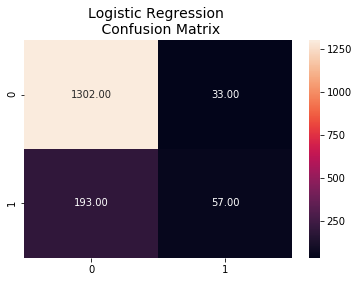

In [31]:
from sklearn import metrics
sns.heatmap(confusion_matrix(y_test,predictions), annot= True, fmt=".2f")
plt.title('Logistic Regression \n Confusion Matrix', fontsize=14)
print(roc_auc_score(y_test, predictions))

In [32]:
test_stroke = y_test.values
for i in range(0, len(test_stroke)):
    if predictions[i] == test_stroke[i]:
        print ('Predicted: {0} Actual:{1}'.format(predictions[i], test_stroke[i])) 
    else:
        print('Wrong Prediction')
        print ('Predicted: {0} Actual:{1}'.format(predictions[i], test_stroke[i])) #Displays the wrong prediction values 

Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 1 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predic

Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 1 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 1 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 1 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 1 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 1 Actual:1
Predicted: 0 Actua

Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 1 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 1 Actual:1
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actua

In [33]:
total_cases = len(test_stroke)
print('Total cases',total_cases)
n=0
for i in range(0, len(test_stroke)):
    if predictions[i] == test_stroke[i]:
        n+=1
print('Corrent predictions',n)
print('Percentage of correct predictions',(n/len(test_stroke))*100)

Total cases 1585
Corrent predictions 1359
Percentage of correct predictions 85.74132492113564


**StatsModel api- LogisticRegression **

In [34]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train,X_train)

In [35]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.342332
         Iterations 7


In [36]:
print(result.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.170      
Dependent Variable: stroke           AIC:              2549.8896  
Date:               2020-05-12 09:29 BIC:              2605.8295  
No. Observations:   3698             Log-Likelihood:   -1265.9    
Df Model:           8                LL-Null:          -1525.0    
Df Residuals:       3689             LLR p-value:      8.8481e-107
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.0726   0.1042  -0.6962 0.4863 -0.2769  0.1317
age                0.0495   0.0033  15.2311 0.0000  0.0431  0.0559
hypertension       0.6815   0.1357   5.0229 0.0000  0.4156  0.9474
heart_disease      0.

**Extracting the significant variables from logit model**

In [37]:
def get_significant_vars(lm):
    #Store the pvalues to corresponding columns
    df_p_vals = pd.DataFrame(lm.pvalues)
    df_p_vals['vars'] = df_p_vals.index
    df_p_vals.columns=['p_values','variables']
    return list(df_p_vals[df_p_vals['p_values']<=0.05]['variables'])

**P value less than 0.05 implies the data is statistically significant. Hence only those feature variables are extracted**

In [38]:
significant_var= get_significant_vars(result)
print(significant_var)

['age', 'hypertension', 'heart_disease', 'Marital_Status', 'Work Profile', 'avg_glucose_level', 'BMI']
